In [1]:
import socket
import spynnaker8 as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pdb
import numpy as np
from numpy import genfromtxt
from spinnorse_tools import fetch_files, plot_in_v_out
import os
import time

Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:
dt = 1           # (ms) simulation timestep

cell_params = {'tau_m': 20.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_rest': -65.0,
               'v_reset': -65.0,
               'v_thresh': -50.0,
               'tau_refrac': 0.0, # 0.1 originally
               'cm': 1,
               'i_offset': 0.0
               }

w = 1.0

2020-12-23 23:14:49 INFO: Read cfg files: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/jprb/.spynnaker.cfg
2020-12-23 23:14:49 INFO: Will search these locations for binaries: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2020-12-23 23:14:49 WARNING: /home/jprb/SpiNNorse/reports has 27 old reports that have not been closed
2020-12-23 23:14:49 WARNING: /home/jprb/SpiNNorse/application_generated_data_files has 27 old reports that have not been closed
2020-12-23 23:14:49 INFO: Setting time scale factor to 1.
2020-12-23 23:14:49 INFO: Setting machine time step to 1000 micro-seconds.
2020-12-23 23:14:49 INFO: Simulating for 200 1.0ms timesteps using a hardware timestep of 1000us
2020-12-23 23:14:49 INFO: Starting execution process


['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:14:49 INFO: Creating transceiver for 192.168.240.1
2020-12-23 23:14:49 INFO: Working out if machine is booted
2020-12-23 23:14:49 INFO: Found board with version [Version: SC&MP 3.2.5 at SpiNNaker:0:0:0 (built Thu Aug  1 10:15:06 2019)]
2020-12-23 23:14:49 INFO: Machine communication successful
2020-12-23 23:14:49 INFO: Detected a machine on IP address 192.168.240.1 which has 858 cores and 120.0 links
2020-12-23 23:14:49 INFO: Time 0:00:00.016588 taken by MachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-12-23 23:14:49 INFO: Time 0:00:00.024854 taken by PreAllocateResourcesForExtraMonitorSupport
2020-12-23 23:14:49 INFO: Time 0:00:00.000293 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-12-23 23:14:49 INFO: Ti

Loading Tags
|0%                          50%                         100%|
2020-12-23 23:15:00 INFO: Time 0:00:00.015212 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2020-12-23 23:15:00 INFO: Time 0:00:00.037144 taken by WriteMemoryIOData
Executing data specifications and loading data for application vertices
|0%                          50%                         100%|
2020-12-23 23:15:00 INFO: Time 0:00:00.134540 taken by HostExecuteApplicationDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2020-12-23 23:15:04 INFO: Time 0:00:03.753617 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2020-12-23 23:15:04 INFO: Time 0:00:00.033380 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2020-12-23 23:15:11 INFO: Time 0:00:06.761216 taken b

2020-12-23 23:15:22 INFO: Time 0:00:00.022732 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.018998 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.013743 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.020325 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-23 23:15:22 INFO: Time 0:00:00.033216 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.037975 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.007230 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.006003 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:15:22 INFO: Time 0:00:00.041135 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%         

Updating run time
|0%                          50%                         100%|
2020-12-23 23:15:43 INFO: Time 0:00:00.028823 taken by ChipRuntimeUpdater
2020-12-23 23:15:43 INFO: Time 0:00:00.000149 taken by DatabaseInterface
2020-12-23 23:15:43 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:15:43 INFO: Time 0:00:00.000718 taken by NotificationProtocol
2020-12-23 23:15:43 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:15:43 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:15:43 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:15:43 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:15:43 INFO: Application started; waiting 0.30000000000000004s f

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:15:54 INFO: Time 0:00:00.030201 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:15:54 INFO: Time 0:00:00.040603 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:15:54 INFO: Time 0:00:00.047581 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:15:55 INFO: Time 0:00:00.006976 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:15:55 INFO: Time 0:00:00.008980 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-23 23:16:18 INFO: Running for 1 steps for a total of 200.0ms
2020-12-23 23:16:18 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:16:18 INFO: Time 0:00:00.060306 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:16:18 INFO: Time 0:00:00.027645 taken by ChipRuntimeUpdater
2020-12-23 23:16:18 INFO: Time 0:00:00.000152 taken by DatabaseInterface
2020-12-23 23:16:18 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:16:18 INFO: Time 0:00:00.000814 taken by NotificationProtocol
2020-12-23 23:16:18 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:16:18 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:16:18 INFO: ** Sending start / resume messa

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:16:29 INFO: Time 0:00:00.083684 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-23 23:16:29 INFO: Time 0:00:00.005996 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-23 23:16:29 INFO: Time 0:00:00.026584 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:16:29 INFO: Time 0:00:00.034872 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:16:29 INFO: Time 0:00:00.035763 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:16:29 INFO: Time 0:00:00.007746 taken by DataInMulticastRoutingGenerator
Gene

2020-12-23 23:16:51 INFO: Time 0:00:00.005884 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-12-23 23:16:51 INFO: Time 0:00:00.007421 taken by comparisonOfRoutingTablesReport
2020-12-23 23:16:51 INFO: Running for 1 steps for a total of 200.0ms
2020-12-23 23:16:51 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:16:51 INFO: Time 0:00:00.049933 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:16:51 INFO: Time 0:00:00.027316 taken by ChipRuntimeUpdater
2020-12-23 23:16:51 INFO: Time 0:00:00.000154 taken by DatabaseInterface
2020-12-23 23:16:51 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:16:51 INFO: Time 0:00:00.000469 taken by NotificationProtocol
2020-12-23 23:16:51 INFO: *** Running si

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-23 23:17:02 INFO: Time 0:00:00.028300 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:17:02 INFO: Time 0:00:00.033232 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:17:02 INFO: Time 0:00:00.036826 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:17:02 INFO: Time 0:00:00.006946 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:17:02 INFO: Time 0:00:00.006713 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-23 23:17:24 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:17:24 INFO: Time 0:00:00.057164 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:17:24 INFO: Time 0:00:00.030681 taken by ChipRuntimeUpdater
2020-12-23 23:17:24 INFO: Time 0:00:00.000169 taken by DatabaseInterface
2020-12-23 23:17:24 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:17:24 INFO: Time 0:00:00.000759 taken by NotificationProtocol
2020-12-23 23:17:24 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:17:24 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:17:24 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:17:35 INFO: Time 0:00:00.037421 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-23 23:17:35 INFO: Time 0:00:00.006035 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-23 23:17:35 INFO: Time 0:00:00.048858 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:17:35 INFO: Time 0:00:00.064555 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:17:35 INFO: Time 0:00:00.083032 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:17:35 INFO: Time 0:00:00.016013 taken by DataInMulticastRoutingGenerator
Gene

2020-12-23 23:18:00 INFO: Time 0:00:00.007122 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-12-23 23:18:00 INFO: Time 0:00:00.006698 taken by comparisonOfRoutingTablesReport
2020-12-23 23:18:00 INFO: Running for 1 steps for a total of 200.0ms
2020-12-23 23:18:00 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:18:00 INFO: Time 0:00:00.049941 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:18:00 INFO: Time 0:00:00.024984 taken by ChipRuntimeUpdater
2020-12-23 23:18:00 INFO: Time 0:00:00.000373 taken by DatabaseInterface
2020-12-23 23:18:00 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:18:00 INFO: Time 0:00:00.000891 taken by NotificationProtocol
2020-12-23 23:18:00 INFO: *** Running si

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:18:11 INFO: Time 0:00:00.024926 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:18:11 INFO: Time 0:00:00.031489 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:18:11 INFO: Time 0:00:00.054668 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:18:11 INFO: Time 0:00:00.008598 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:18:11 INFO: Time 0:00:00.009133 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-23 23:18:33 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:18:33 INFO: Time 0:00:00.048510 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:18:33 INFO: Time 0:00:00.027049 taken by ChipRuntimeUpdater
2020-12-23 23:18:33 INFO: Time 0:00:00.000139 taken by DatabaseInterface
2020-12-23 23:18:33 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:18:33 INFO: Time 0:00:00.000504 taken by NotificationProtocol
2020-12-23 23:18:33 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:18:33 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:18:33 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:18:44 INFO: Time 0:00:00.034796 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:18:44 INFO: Time 0:00:00.040806 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:18:44 INFO: Time 0:00:00.007040 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:18:44 INFO: Time 0:00:00.005960 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:18:44 INFO: Time 0:00:00.048316 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-23 23:19:06 INFO: Time 0:00:00.057220 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:19:06 INFO: Time 0:00:00.027140 taken by ChipRuntimeUpdater
2020-12-23 23:19:06 INFO: Time 0:00:00.000177 taken by DatabaseInterface
2020-12-23 23:19:06 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:19:06 INFO: Time 0:00:00.000838 taken by NotificationProtocol
2020-12-23 23:19:06 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:19:06 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:19:06 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:19:06 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:19:17 INFO: Time 0:00:00.024675 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-23 23:19:17 INFO: Time 0:00:00.003636 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-23 23:19:17 INFO: Time 0:00:00.036587 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:19:17 INFO: Time 0:00:00.033581 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:19:17 INFO: Time 0:00:00.044808 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:19:17 INFO: Time 0:00:00.007972 taken by DataInMulticastRoutingGenerator
Gene

2020-12-23 23:19:39 INFO: Time 0:00:00.005442 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-12-23 23:19:39 INFO: Time 0:00:00.007775 taken by comparisonOfRoutingTablesReport
2020-12-23 23:19:39 INFO: Running for 1 steps for a total of 200.0ms
2020-12-23 23:19:39 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:19:39 INFO: Time 0:00:00.047086 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:19:39 INFO: Time 0:00:00.024855 taken by ChipRuntimeUpdater
2020-12-23 23:19:39 INFO: Time 0:00:00.000627 taken by DatabaseInterface
2020-12-23 23:19:39 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:19:39 INFO: Time 0:00:00.000534 taken by NotificationProtocol
2020-12-23 23:19:39 INFO: *** Running si

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:19:50 INFO: Time 0:00:00.040016 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:19:50 INFO: Time 0:00:00.039742 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:19:50 INFO: Time 0:00:00.006590 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:19:50 INFO: Time 0:00:00.005755 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:19:50 INFO: Time 0:00:00.050917 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-23 23:20:12 INFO: Time 0:00:00.069424 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:20:12 INFO: Time 0:00:00.028991 taken by ChipRuntimeUpdater
2020-12-23 23:20:12 INFO: Time 0:00:00.000178 taken by DatabaseInterface
2020-12-23 23:20:12 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:20:12 INFO: Time 0:00:00.000747 taken by NotificationProtocol
2020-12-23 23:20:12 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:20:12 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:20:12 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:20:12 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:20:23 INFO: Time 0:00:00.027151 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:20:23 INFO: Time 0:00:00.050006 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:20:23 INFO: Time 0:00:00.007352 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:20:23 INFO: Time 0:00:00.007912 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:20:23 INFO: Time 0:00:00.050685 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-23 23:20:47 INFO: Time 0:00:00.051957 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:20:47 INFO: Time 0:00:00.026293 taken by ChipRuntimeUpdater
2020-12-23 23:20:47 INFO: Time 0:00:00.000158 taken by DatabaseInterface
2020-12-23 23:20:47 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:20:47 INFO: Time 0:00:00.000631 taken by NotificationProtocol
2020-12-23 23:20:47 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:20:48 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:20:48 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:20:48 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...



2020-12-23 23:20:59 INFO: Time 0:00:00.028312 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:20:59 INFO: Time 0:00:00.033405 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:20:59 INFO: Time 0:00:00.037622 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:20:59 INFO: Time 0:00:00.009257 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:20:59 INFO: Time 0:00:00.007819 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-23 23:21:20 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:21:20 INFO: Time 0:00:00.090126 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:21:20 INFO: Time 0:00:00.027325 taken by ChipRuntimeUpdater
2020-12-23 23:21:20 INFO: Time 0:00:00.000133 taken by DatabaseInterface
2020-12-23 23:21:20 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:21:20 INFO: Time 0:00:00.000819 taken by NotificationProtocol
2020-12-23 23:21:20 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:21:21 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:21:21 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:21:32 INFO: Time 0:00:00.028208 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:21:32 INFO: Time 0:00:00.041701 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:21:32 INFO: Time 0:00:00.046393 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:21:32 INFO: Time 0:00:00.005673 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:21:32 INFO: Time 0:00:00.007522 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-23 23:21:53 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:21:53 INFO: Time 0:00:00.047612 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:21:53 INFO: Time 0:00:00.027113 taken by ChipRuntimeUpdater
2020-12-23 23:21:53 INFO: Time 0:00:00.000126 taken by DatabaseInterface
2020-12-23 23:21:53 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:21:53 INFO: Time 0:00:00.000745 taken by NotificationProtocol
2020-12-23 23:21:53 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:21:53 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:21:53 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:22:05 INFO: Time 0:00:00.029231 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-23 23:22:05 INFO: Time 0:00:00.034727 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:22:06 INFO: Time 0:00:00.062883 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:22:06 INFO: Time 0:00:00.009820 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:22:06 INFO: Time 0:00:00.008529 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-23 23:22:29 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-23 23:22:29 INFO: Time 0:00:00.058527 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:22:29 INFO: Time 0:00:00.027457 taken by ChipRuntimeUpdater
2020-12-23 23:22:29 INFO: Time 0:00:00.000134 taken by DatabaseInterface
2020-12-23 23:22:29 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:22:29 INFO: Time 0:00:00.000928 taken by NotificationProtocol
2020-12-23 23:22:29 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:22:29 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:22:29 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:22:40 INFO: Time 0:00:00.033506 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:22:40 INFO: Time 0:00:00.037820 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:22:40 INFO: Time 0:00:00.008045 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:22:40 INFO: Time 0:00:00.006109 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:22:40 INFO: Time 0:00:00.046079 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-23 23:23:04 INFO: Time 0:00:00.044330 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:23:04 INFO: Time 0:00:00.027431 taken by ChipRuntimeUpdater
2020-12-23 23:23:04 INFO: Time 0:00:00.000142 taken by DatabaseInterface
2020-12-23 23:23:04 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:23:04 INFO: Time 0:00:00.000574 taken by NotificationProtocol
2020-12-23 23:23:04 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:23:04 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:23:04 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:23:04 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']
Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...
0 Running simulation...


2020-12-23 23:23:15 INFO: Time 0:00:00.169591 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-23 23:23:15 INFO: Time 0:00:00.032574 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-23 23:23:15 INFO: Time 0:00:00.004959 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-23 23:23:15 INFO: Time 0:00:00.003026 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-23 23:23:15 INFO: Time 0:00:00.045924 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-23 23:23:39 INFO: Time 0:00:00.051633 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-23 23:23:39 INFO: Time 0:00:00.024285 taken by ChipRuntimeUpdater
2020-12-23 23:23:39 INFO: Time 0:00:00.000199 taken by DatabaseInterface
2020-12-23 23:23:39 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-23 23:23:39 INFO: Time 0:00:00.000662 taken by NotificationProtocol
2020-12-23 23:23:39 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-23 23:23:39 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-23 23:23:39 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-23 23:23:39 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

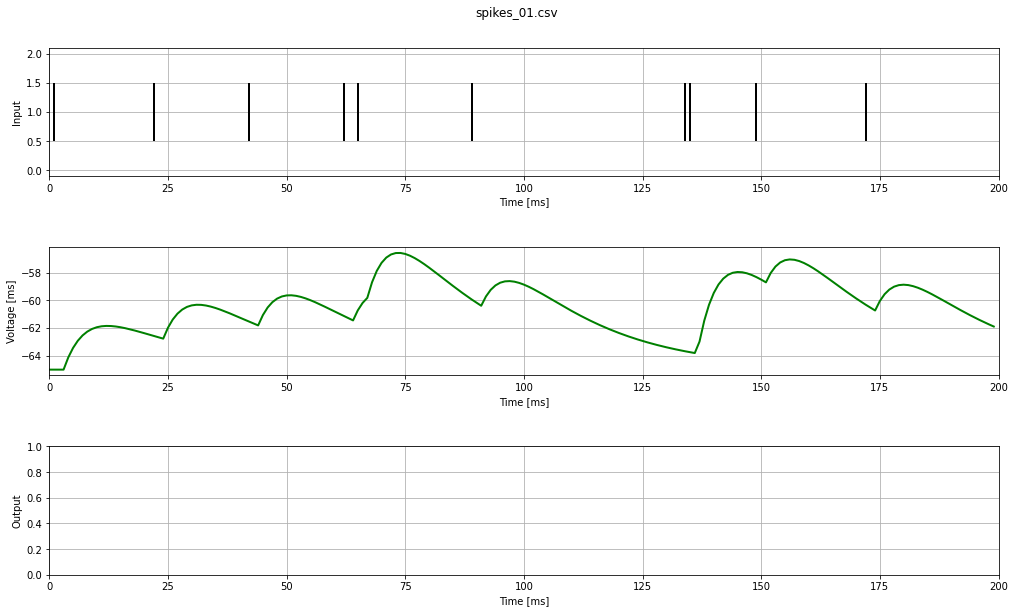

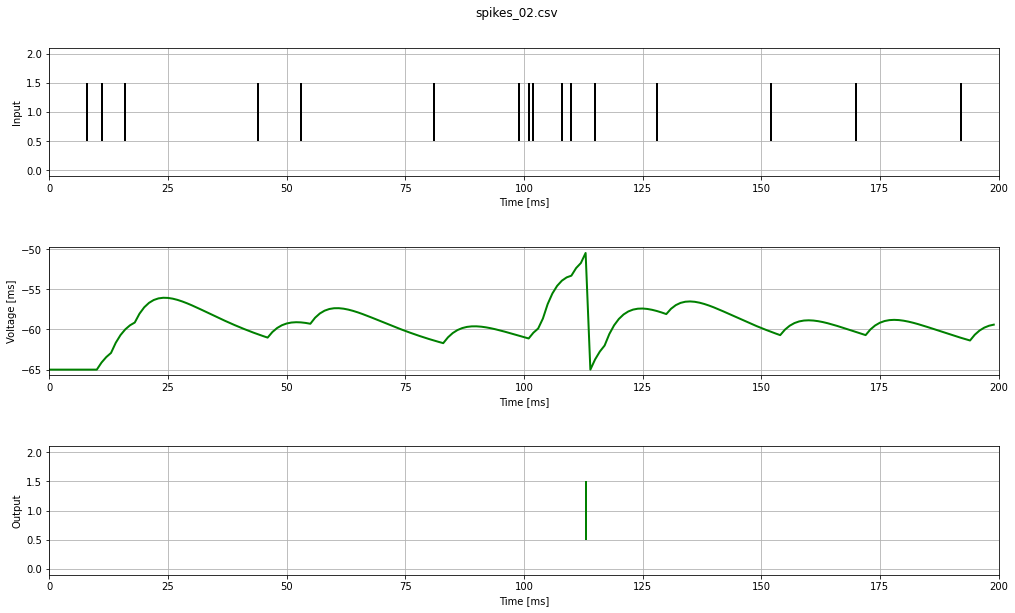

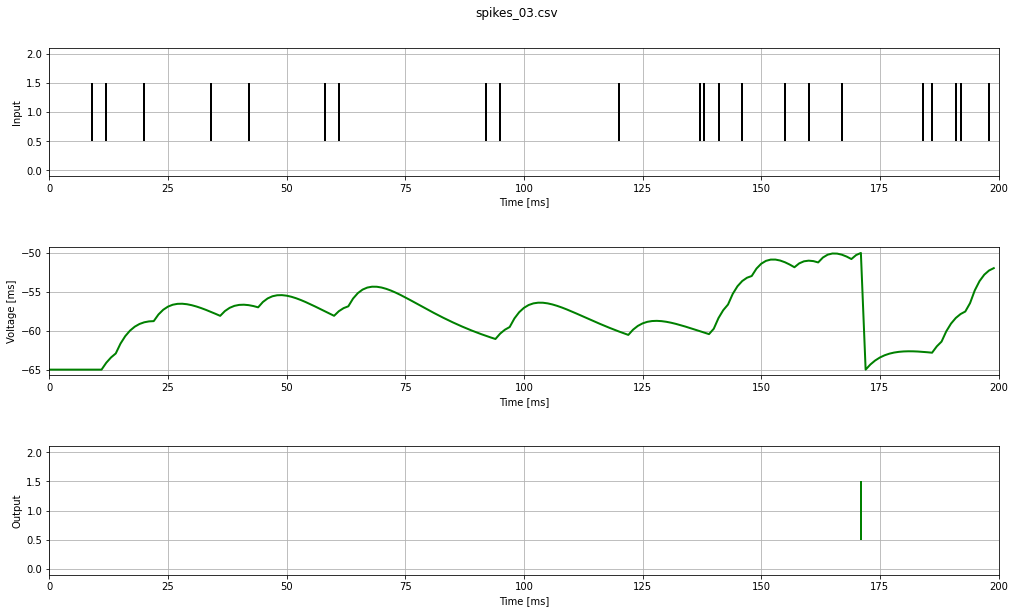

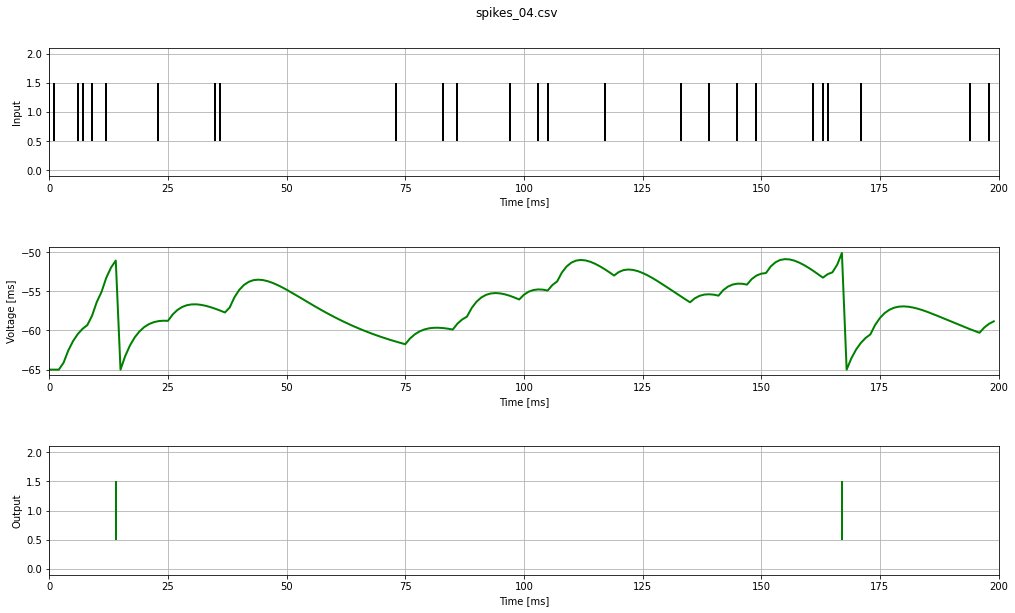

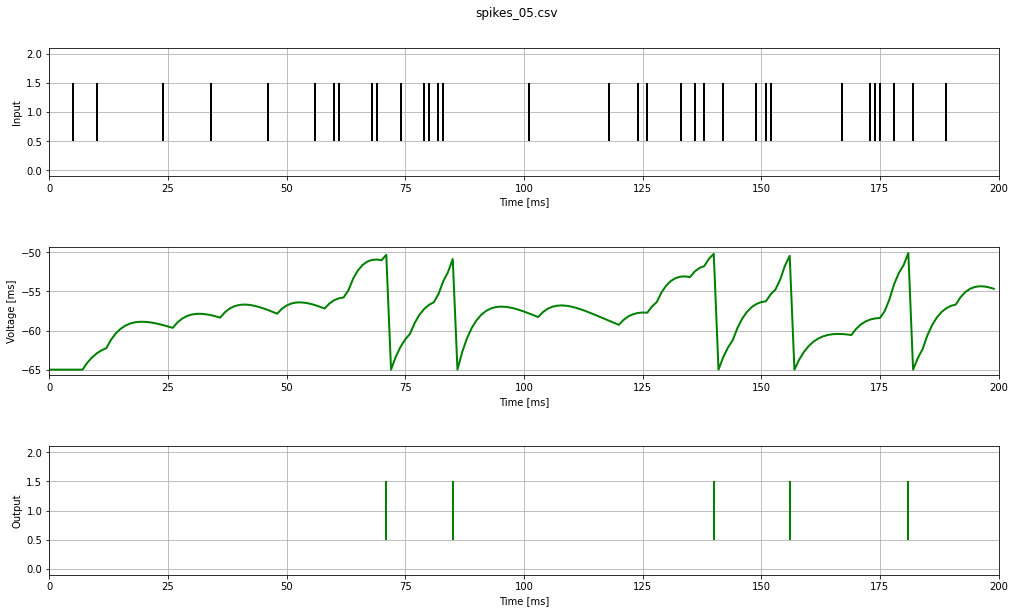

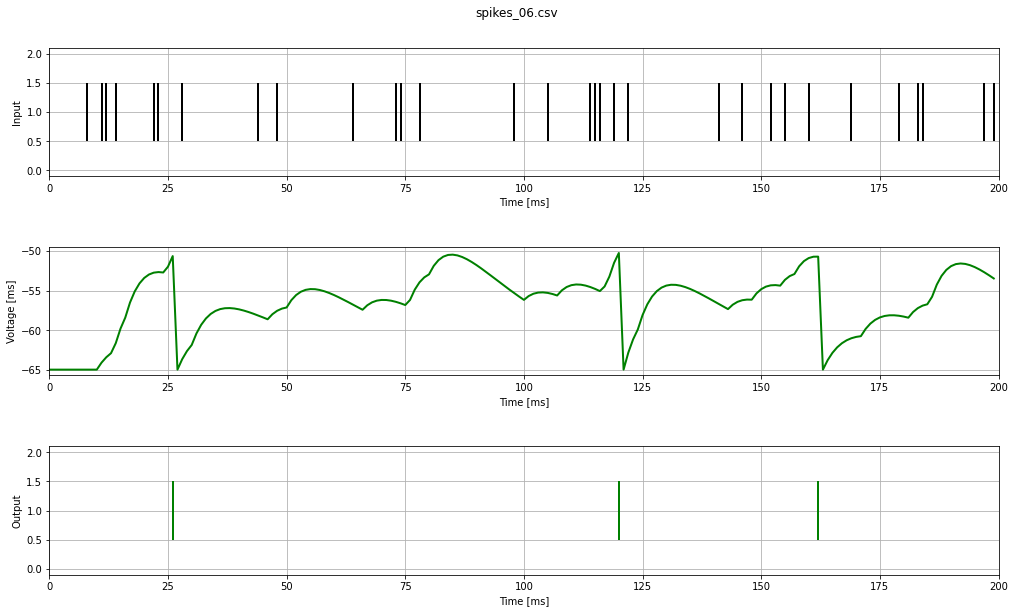

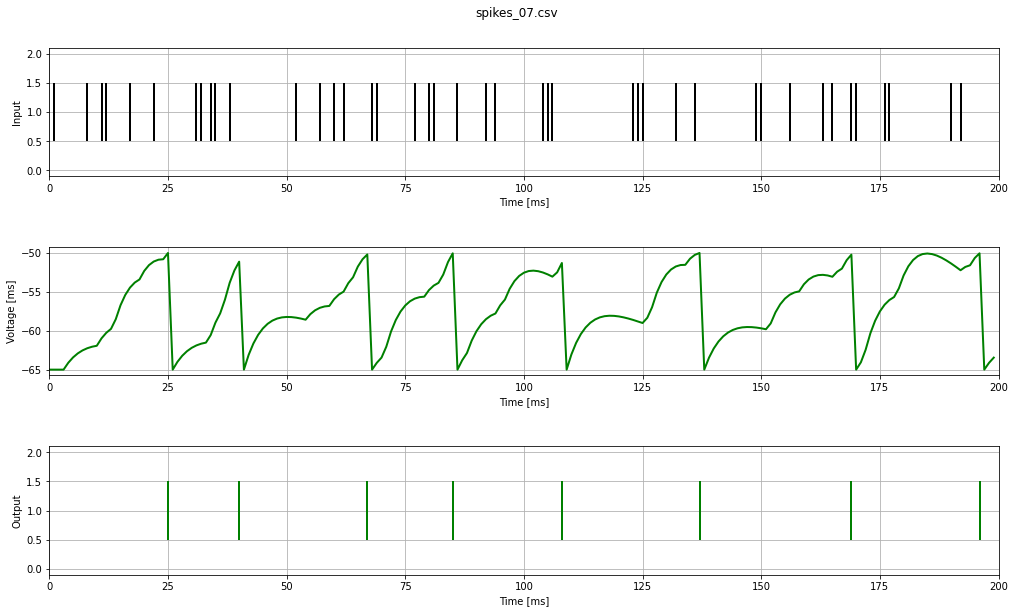

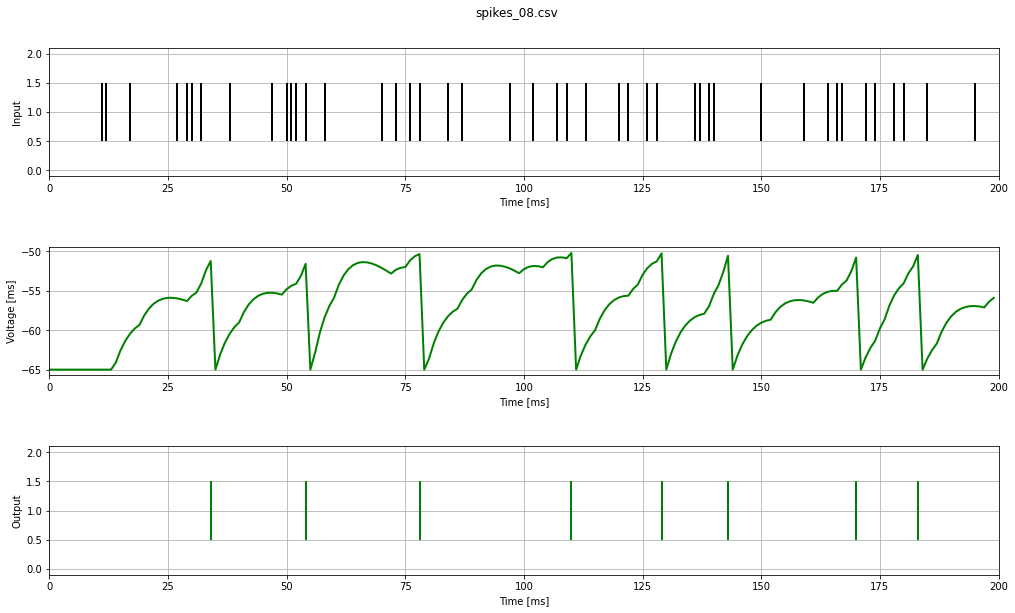

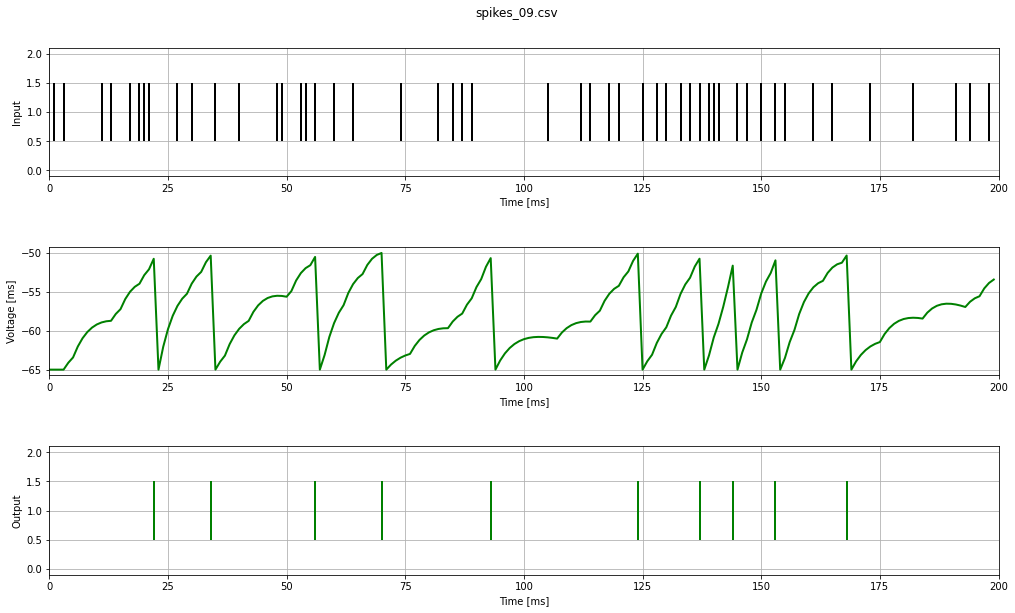

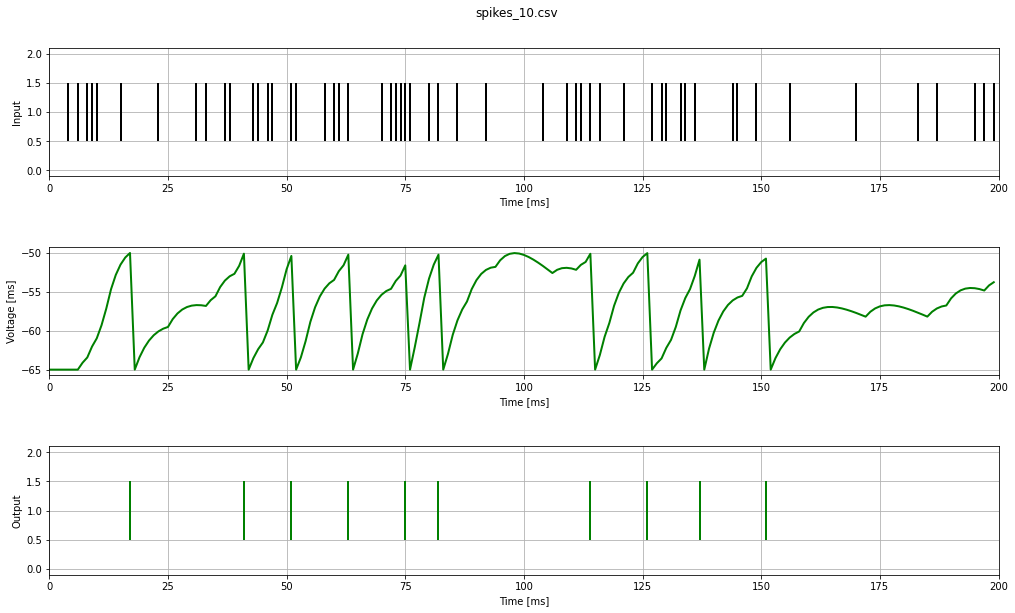

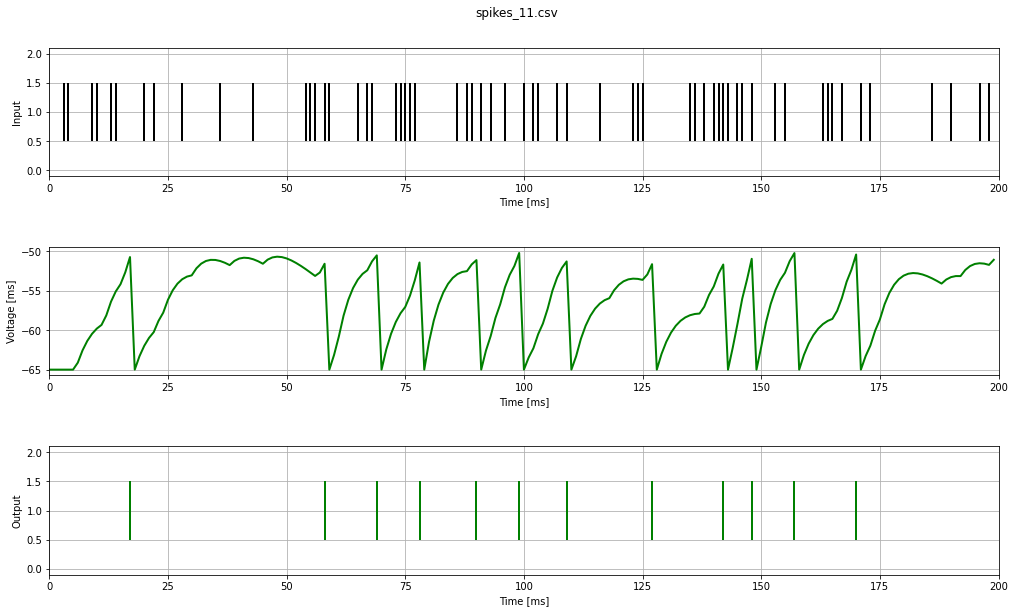

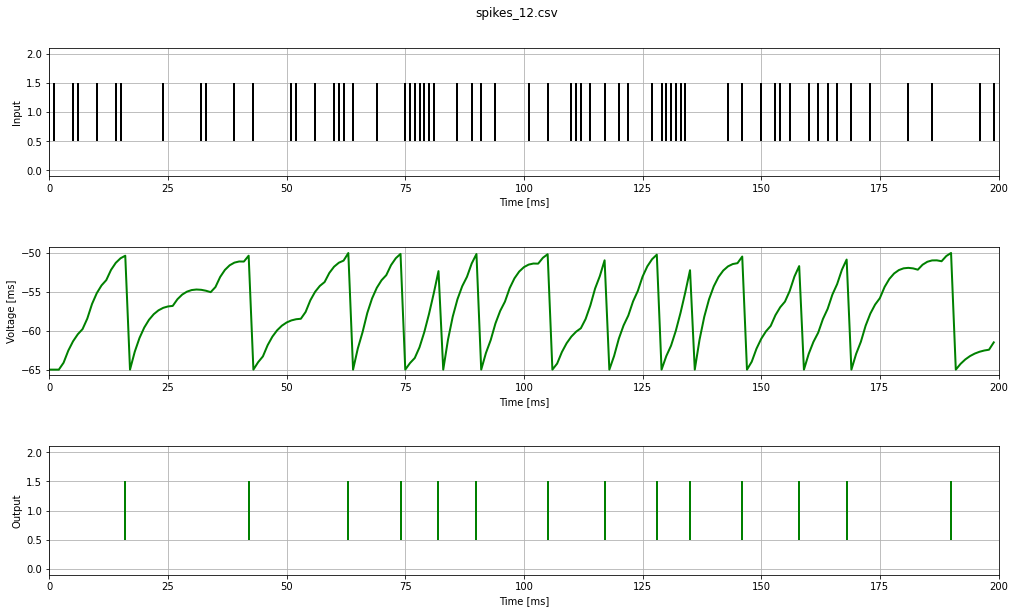

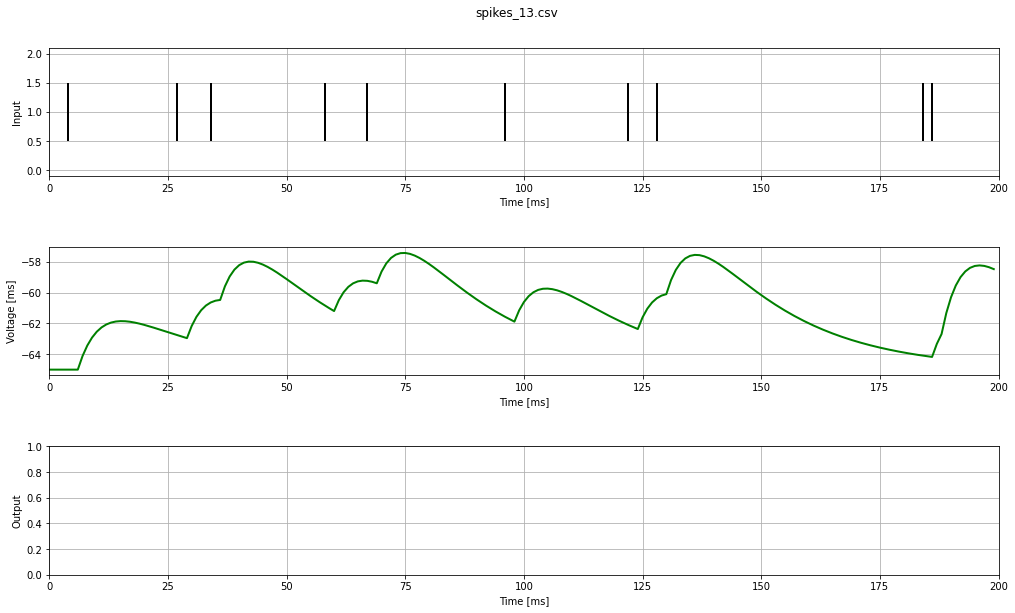

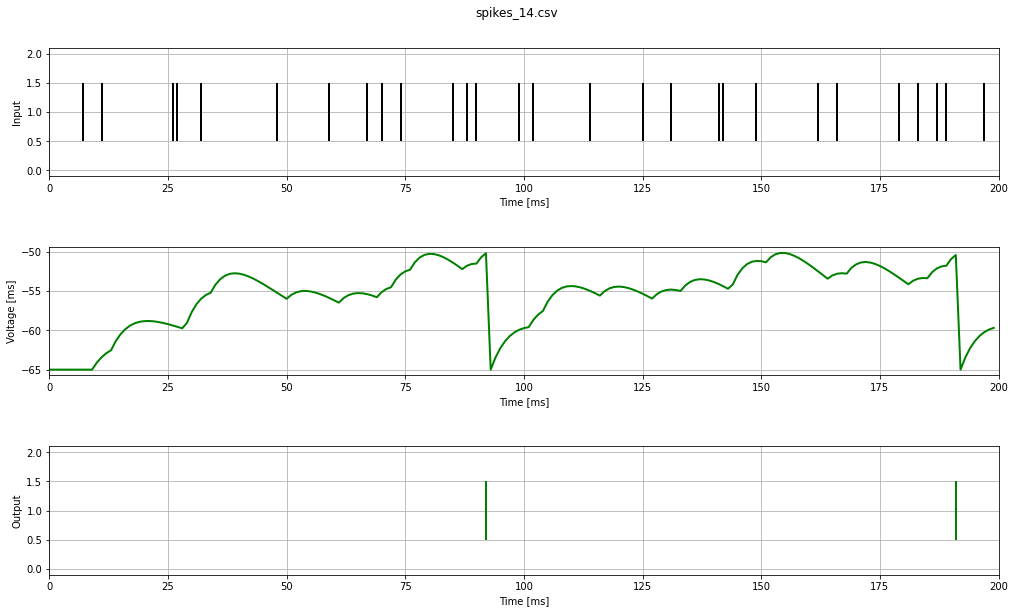

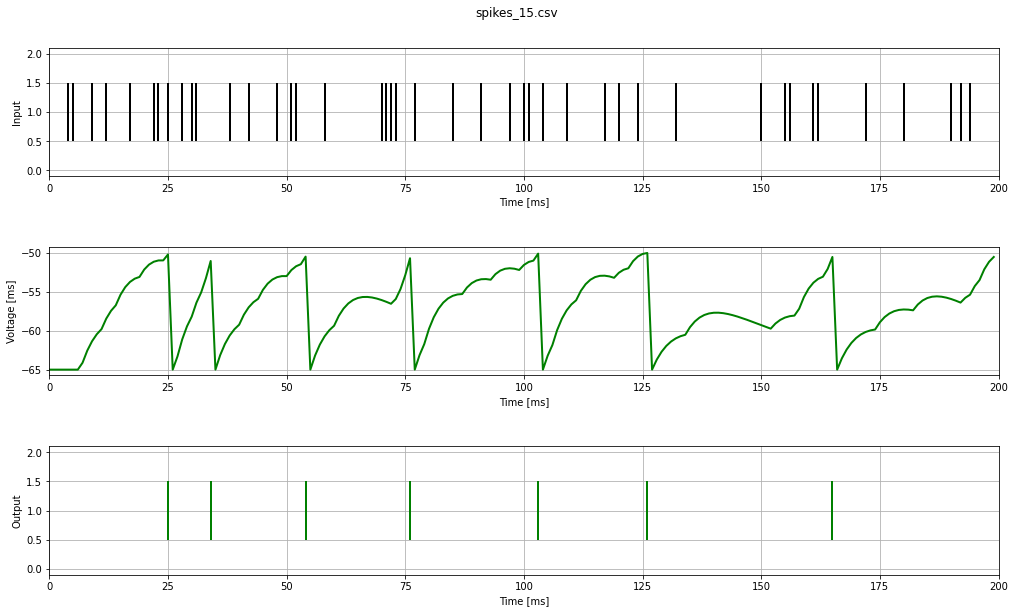

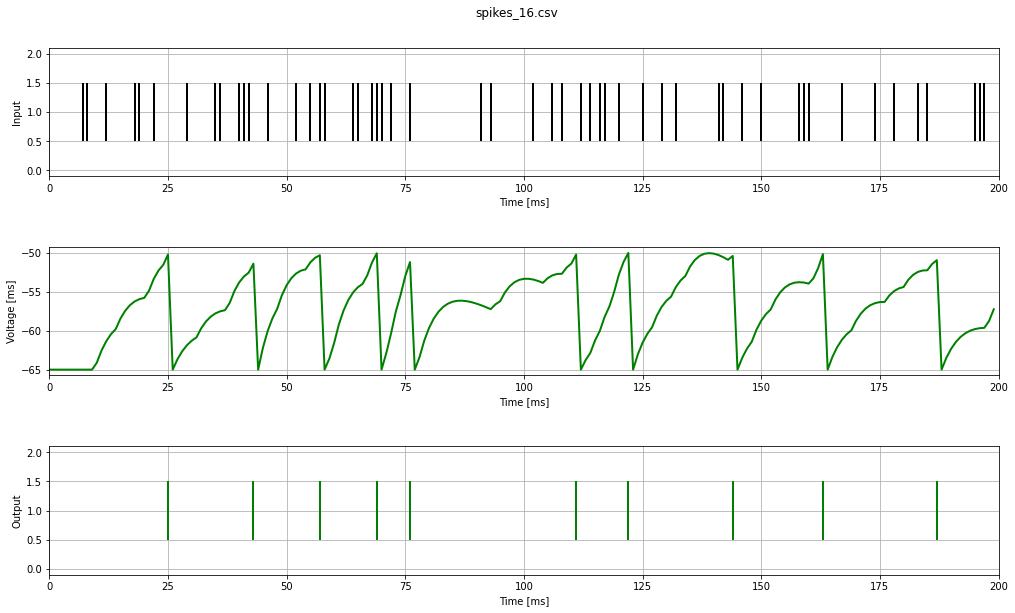

In [3]:
'''
Fetch available trains of spikes in path
'''
path = "summary/common/"
files = fetch_files(path) 


'''
Simulate for each input file + Plot + Save data
'''
n = len(files)
for i in range(n):
        
    #SpiNNaker Setup
    delay = 2*dt
    node_id = p.setup(timestep=dt, min_delay=delay, max_delay=delay)     
    p.set_number_of_neurons_per_core(p.IF_curr_exp, 100) #  100 neurons per core
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")

    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    nb_steps = len(i_spikes)

    # Populations
    print("Creating cell populations in node %s ..." % node_id)
    celltype = p.IF_curr_exp
    cells_l1 = p.Population(1, celltype(**cell_params), label="Layer_1")

    spike_train_1 = p.SpikeSourceArray(spike_times=(i_indexes))
    cells_l0 = p.Population(1,spike_train_1)

    # Connectivity
    print("Connecting populations  in node %s ..." % node_id)
    cell_conn = p.AllToAllConnector()
    connections = { 'i1l1': p.Projection(cells_l0, cells_l1, cell_conn,
                            receptor_type='excitatory',
                            synapse_type=p.StaticSynapse(weight=w, delay=delay))}

    # === Setup recording ===
    print("Setting up recording in node %s ..." % node_id)
    cells_l1.record(["v","spikes"])
    cells_l0.record(["spikes"])

    # === Run simulation ===
    print("%d Running simulation..." % node_id)
    p.run(nb_steps)

    # === Print results to file ===

    l1_voltage = cells_l1.get_data("v")
    l1_spikes = cells_l1.get_data("spikes")
    in_spikes = cells_l0.get_data("spikes")

    # === Finished with simulator ===

    p.end()
    time.sleep(10)
    v_array = np.array(l1_voltage.segments[0].filter(name="v")[0]).reshape(-1)

    i_indexes = np.asarray(in_spikes.segments[0].spiketrains[0])
    o_indexes = np.asarray(l1_spikes.segments[0].spiketrains[0])

    o_spikes = np.zeros(nb_steps)
    for i in o_indexes.astype(int):
        o_spikes[i] = 1

    np.savetxt("summary/spinnaker/" + "voltage_" + sfn, v_array, delimiter=",")
    np.savetxt("summary/spinnaker/" + "output_" + sfn, o_spikes, delimiter=",")

    xlim = len(i_spikes)
    plot_in_v_out(i_indexes, v_array, o_indexes, sfn, xlim)